In [1]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
nitrate = pd.read_csv('C:/Users/Austin/Desktop/OEAS895_Clayton/jma_nitrate.csv') #read in data
print(nitrate)

       Unnamed: 0    theta      sal  depth  nitrate         lon        lat  \
0               0  25.8807  34.0215      0     0.09  140.242833  34.926167   
1               1  25.8993  34.0217     13     0.00  140.242833  34.926167   
2               2  25.8843  34.0196     27     0.00  140.242833  34.926167   
3               3  25.9894  34.2936     51     0.48  140.242833  34.926167   
4               4  23.6146  34.5002     75     2.71  140.242833  34.926167   
5               5  20.0183  34.7358    100     4.23  140.242833  34.926167   
6               6  16.5906  34.6531    126     8.71  140.242833  34.926167   
7               7  14.6750  34.5628    151    12.31  140.242833  34.926167   
8               8  13.4401  34.4981    201    15.10  140.242833  34.926167   
9               9  10.4524  34.3719    251    21.73  140.242833  34.926167   
10             10   8.0153  34.2350    301    27.17  140.242833  34.926167   
11             11   6.8210  34.2255    400    30.79  140.242833 

In [3]:
x = nitrate[['theta', 'sal', 'depth']]
x = x[nitrate.nitrate>0]
y = nitrate.nitrate[nitrate.nitrate > 0]
print(np.shape(x))
print(np.shape(y))
x.head()

(15574, 3)
(15574,)


,theta,sal,depth
0,25.8807,34.0215,0
3,25.9894,34.2936,51
4,23.6146,34.5002,75
5,20.0183,34.7358,100
6,16.5906,34.6531,126


In [4]:
#import train test split
from sklearn.model_selection import train_test_split
#split into train and test sets --> 0.2 = 20% test, 80% train
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)
print(X_train.shape)
print(X_test.shape)

(12459, 3)
(3115, 3)


In [8]:
# scale the training data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\Austin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Austin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys
C:\Users\Austin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [11]:
#n  = int(input('Choose a number for hidden nodes: '))

# pick model
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(10,10),
                     activation='relu', max_iter=2500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# compute the R^2 score
print(metrics.r2_score(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))

0.987879030332576
2.88564533625312


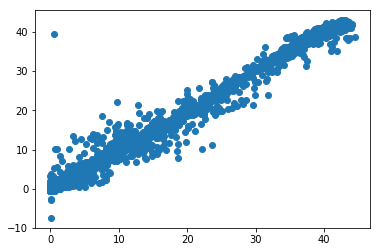

In [13]:
#create plot to compare actual NO3 to modelled NO3
plt.scatter(y_test,y_pred)
plt.show()

In [10]:
##THIS CELL IS ONLY FOR MODEL ARCHITECTURE COMPARISON AND SHOULD NOT BE RUN WITH THE REST OF THE SCRIPT

#import sklearn packages
from sklearn.neural_network import MLPRegressor
from sklearn import metrics

#create empty lists
scores=[]
scores_list=[]
results=[]

#create a range of numbers of nodes to be tested (1-10)
n = tuple(range(2, 15, 4))
print(n)
#create a range of numbers of layers to be tested (1-3)
l = tuple(range(1,5,1))
print(l)

#build a nested loop to loop through both various numbers of layers and nodes
for l in l:
    layers = np.ones(l, dtype=np.int8) #create an array of ones that loops with l
    print(layers)
    for i in n:
        model = MLPRegressor(hidden_layer_sizes=(i*layers), max_iter=2000, random_state=1) #1000 iterations wasn't enough to optimize
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        scores = metrics.r2_score(y_test,y_pred)
        scores1 = metrics.mean_squared_error(y_test,y_pred)
        print(l,i,scores, scores1)
        scores_list.append(metrics.r2_score(y_test,y_pred))

(2, 6, 10, 14)
(1, 2, 3, 4)
[1]
1 2 0.8935102609823077 25.352065650414318
1 6 0.9652067312724356 8.283250960237309
1 10 0.9851684503835214 3.530954466062419
1 14 0.9857123259124602 3.40147374573671
[1 1]
2 2 0.8935272846054492 25.348012827903247
2 6 0.9751302859407321 5.9207453164369195
2 10 0.987629408879584 2.9450728409346114
2 14 0.9897110329915286 2.449499543147298
[1 1 1]
3 2 -2.4873931720126308e-05 238.0764239806443
3 6 0.9848881516969225 3.5976853151557884
3 10 0.9874927328869192 2.97761136315126
3 14 0.9904475959069139 2.274145639956645
[1 1 1 1]
4 2 -2.6196976503189973e-05 238.0767389585803
4 6 0.9887276203956161 2.6836210737567097
4 10 0.9903598643517206 2.295031935363036
4 14 0.9902835738073351 2.3131944635803885
